## Regression exercise

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [83]:
df = pd.read_csv("bmw.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


### EDA

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


There are not any null values.

Now we will print the values of the data in histplots and show the number of counts per value of each column. In the columns that are not object type we will be printing boxplots as well.

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 Z4           108
 6 Series     108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64


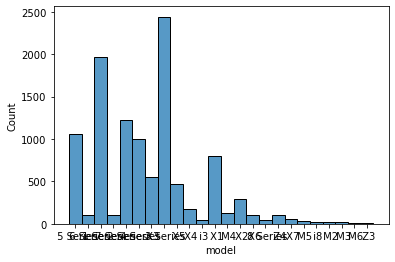

2019    3485
2016    1882
2017    1721
2015     922
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2005       6
2002       6
1999       4
2001       3
2000       2
2003       2
1997       1
1998       1
1996       1
Name: year, dtype: int64


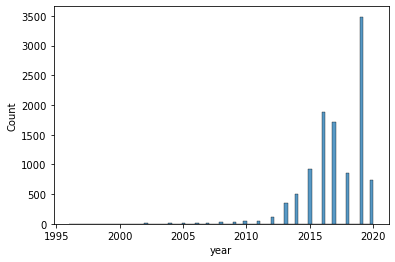

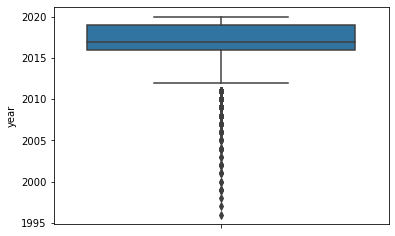

20980    45
15000    43
14000    40
18000    37
29995    36
         ..
5678      1
19997     1
42520     1
19989     1
32748     1
Name: price, Length: 3777, dtype: int64


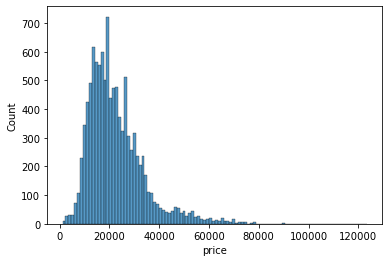

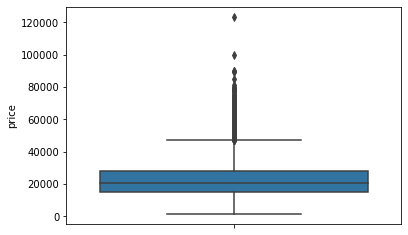

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64


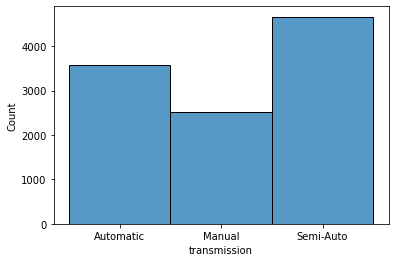

123      151
10       149
101       80
1000      69
5000      60
        ... 
397        1
4495       1
27024      1
58436      1
33301      1
Name: mileage, Length: 8086, dtype: int64


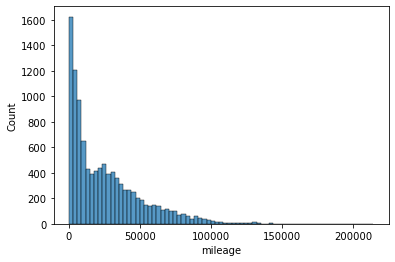

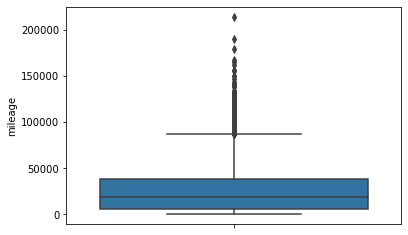

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64


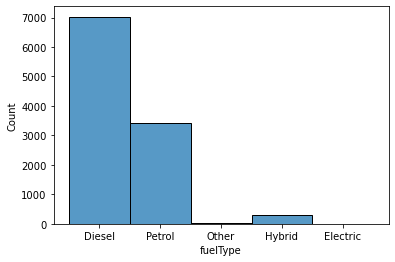

145    5372
150    1241
30      989
125     844
20      485
160     432
0       340
200     337
165     118
135     117
205      98
300      84
235      71
260      60
140      36
325      26
305      25
555      17
265      14
240      13
570      12
330      12
565       9
270       5
120       4
315       3
195       3
245       2
190       2
580       2
280       1
540       1
110       1
185       1
130       1
250       1
155       1
255       1
Name: tax, dtype: int64


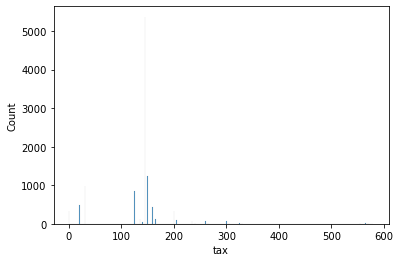

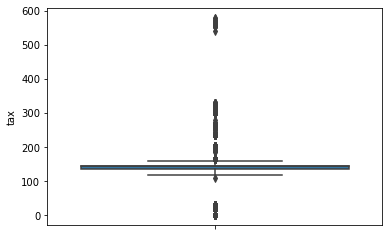

65.7     684
60.1     591
62.8     575
54.3     497
50.4     442
        ... 
20.8       1
128.4      1
26.6       1
23.2       1
22.6       1
Name: mpg, Length: 102, dtype: int64


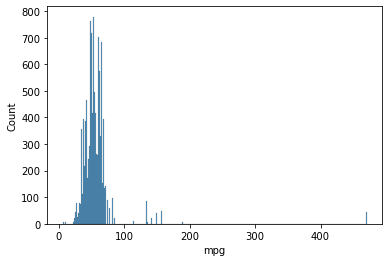

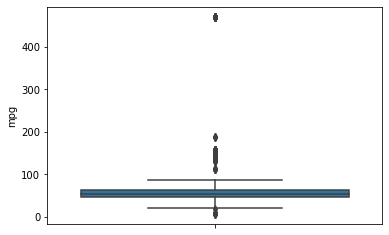

2.0    6575
3.0    2458
1.5    1463
1.6     109
4.4      79
0.0      47
2.5      14
0.6       7
4.0       6
2.2       6
3.2       5
1.9       5
6.6       2
2.8       2
1.0       1
5.0       1
3.5       1
Name: engineSize, dtype: int64


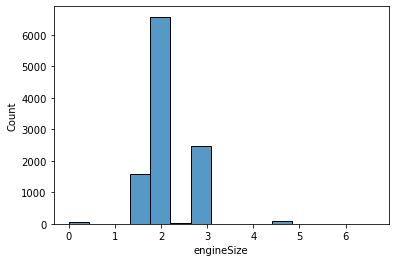

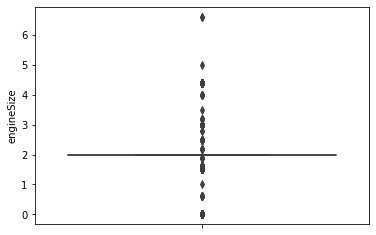

In [85]:
for i in df:
    print(df[i].value_counts())
    sns.histplot(data=df, x=i)
    plt.show()
    if df[i].dtype != 'O': 
        sns.boxplot(data=df, y=i)
        plt.show()

<AxesSubplot:>

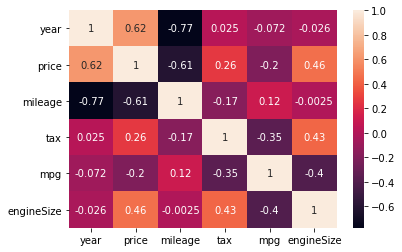

In [86]:
sns.heatmap(df.corr(), annot=True)

It appears to be positive correlation between `year` and `price`. There's also negative correlation between `mileage` and `year`, and `price` and `mileage`.

In [87]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


By the graphics we can see that the variables `mpg` and `tax` have some outliers. We can see from the function above that `mpg` has its' mean at 56.399 but the maximum value is 470. The same happens with `tax` that has its' maximum value at 580 when the majority of the values are below 400. We can also see that `price` has a gaussian distribution while `mileage` has a logaritmic one. We also look at the percentile to know how the values of that feature increase in the data. The two features mentioned have a big jump from the 75% and the maximum value.

To delete those outliers from our data we will define two limits, one for `mpg` at 400 and the other one for `tax` at 300.

In [88]:
cont = 0
for i in df['tax']:
    if i > 300:
        df = df.drop(cont)
    cont += 1
df = df.reset_index(drop=True)

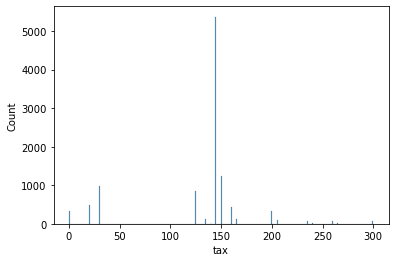

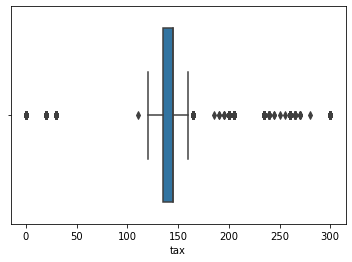

In [89]:
sns.histplot(df['tax'])
plt.show()
sns.boxplot(data=df, x='tax')
plt.show()

In [90]:
cont = 0
for i in df['mpg']:
    if i > 400:
        df = df.drop(cont)
    cont += 1
df = df.reset_index(drop=True)

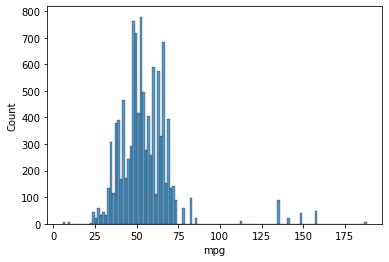

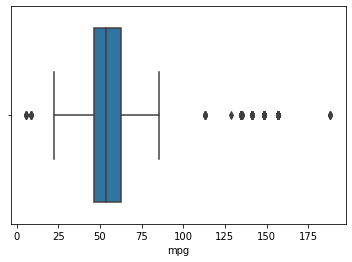

In [91]:
sns.histplot(df['mpg'])
plt.show()
sns.boxplot(data=df, x='mpg')
plt.show()

Now we see more clearly the shape of the data and its' values.

<AxesSubplot:>

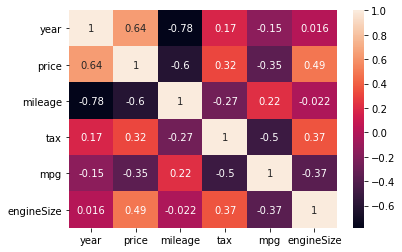

In [92]:
sns.heatmap(df.corr(), annot=True)

We can see that after doing the outlier pruning the correlation matrix shows higher values for some features. Some of them show more positive or more negative correlation after the process.

I do not see any irrelevant features. An irrelevant feature would be for example one that is always 1 or is always 0. It would show in the correlation matrix but we currently do not have any.

### Prepare the data for training

We would have to normalize the data is out features' range was very wide. That is to say, when the data points are far away from each other. We should also consider to normalize the data when the is high dimensional data, because of the curse of dimensionality.

In this dataset we do not have that many dimensions and the data points are not that far away from each other. So we would not need to normalize the data.

Anyway, just to see if there is any difference in the output of the predictions, we will be comparing two options: one in which data is normalized and the other one in which it is not. But as stated before, we know that it would not be necessary.

Another reason to normalize the data would be if the model used for predicting would uses distances. In this exercise we will be using MLPRegressor model which is a type of neural network. In that case and only in that case, normalizing the data would be justified.

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
minMax = MinMaxScaler()

First, we will separate the data into X (model input features) and y (output feature).

In [95]:
X = df.drop('price', axis=1)
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...
10626,X3,2016,Automatic,40818,Diesel,150,54.3,2.0
10627,5 Series,2016,Automatic,42947,Diesel,125,60.1,2.0
10628,3 Series,2017,Manual,25468,Petrol,200,42.8,2.0
10629,1 Series,2014,Automatic,45000,Diesel,30,64.2,2.0


In [96]:
y = df['price']
y

0        11200
1        27000
2        16000
3        12750
4        14500
         ...  
10626    19000
10627    14600
10628    13100
10629     9930
10630    15981
Name: price, Length: 10631, dtype: int64

In [97]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10626,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10627,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10628,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10629,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


Now we will convert the "object" type features in the input to numeric values so that the model can process them.

In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10631 entries, 0 to 10630
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10631 non-null  object 
 1   year          10631 non-null  int64  
 2   transmission  10631 non-null  object 
 3   mileage       10631 non-null  int64  
 4   fuelType      10631 non-null  object 
 5   tax           10631 non-null  int64  
 6   mpg           10631 non-null  float64
 7   engineSize    10631 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 664.6+ KB


There are no null values. The columns we have to convert are `model`, `transmission` and `fuelType`.

In [99]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [100]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...
10626,X3,2016,Automatic,40818,Diesel,150,54.3,2.0
10627,5 Series,2016,Automatic,42947,Diesel,125,60.1,2.0
10628,3 Series,2017,Manual,25468,Petrol,200,42.8,2.0
10629,1 Series,2014,Automatic,45000,Diesel,30,64.2,2.0


In [101]:
#We will process model and fuelType with LabelEncoder and use OneHotEncoder for transmission
le = LabelEncoder()
onehot = OneHotEncoder()

enc_df_transmission = pd.DataFrame(onehot.fit_transform(X[['transmission']]).toarray())
enc_df_transmission.columns = onehot.get_feature_names(['transmission'])
X = X.drop('transmission', axis=1)
X = pd.concat([X, enc_df_transmission], axis=1)
X

,model,year,mileage,fuelType,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,5 Series,2014,67068,Diesel,125,57.6,2.0,1.0,0.0,0.0
1,6 Series,2018,14827,Petrol,145,42.8,2.0,1.0,0.0,0.0
2,5 Series,2016,62794,Diesel,160,51.4,3.0,1.0,0.0,0.0
3,1 Series,2017,26676,Diesel,145,72.4,1.5,1.0,0.0,0.0
4,7 Series,2014,39554,Diesel,160,50.4,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10626,X3,2016,40818,Diesel,150,54.3,2.0,1.0,0.0,0.0
10627,5 Series,2016,42947,Diesel,125,60.1,2.0,1.0,0.0,0.0
10628,3 Series,2017,25468,Petrol,200,42.8,2.0,0.0,1.0,0.0
10629,1 Series,2014,45000,Diesel,30,64.2,2.0,1.0,0.0,0.0


In [102]:
X['model'] = le.fit_transform(X['model'])
X

,model,year,mileage,fuelType,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,4,2014,67068,Diesel,125,57.6,2.0,1.0,0.0,0.0
1,5,2018,14827,Petrol,145,42.8,2.0,1.0,0.0,0.0
2,4,2016,62794,Diesel,160,51.4,3.0,1.0,0.0,0.0
3,0,2017,26676,Diesel,145,72.4,1.5,1.0,0.0,0.0
4,6,2014,39554,Diesel,160,50.4,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10626,15,2016,40818,Diesel,150,54.3,2.0,1.0,0.0,0.0
10627,4,2016,42947,Diesel,125,60.1,2.0,1.0,0.0,0.0
10628,2,2017,25468,Petrol,200,42.8,2.0,0.0,1.0,0.0
10629,0,2014,45000,Diesel,30,64.2,2.0,1.0,0.0,0.0


In [103]:
# We will display the values to see how the encoded numeric values correspond to the labels we had.
X['model'].value_counts()

2     2429
0     1962
1     1229
4     1046
3      995
13     804
15     548
17     456
14     288
16     179
10     117
5      103
6      103
21     100
18     100
19      55
7       39
11      21
8       21
22      17
9       13
20       5
12       1
Name: model, dtype: int64

In [104]:
df['model'].value_counts()

 3 Series    2429
 1 Series    1962
 2 Series    1229
 5 Series    1046
 4 Series     995
 X1           804
 X3           548
 X5           456
 X2           288
 X4           179
 M4           117
 7 Series     103
 6 Series     103
 Z4           100
 X6           100
 X7            55
 8 Series      39
 M5            21
 M2            21
 i8            17
 M3            13
 Z3             5
 M6             1
Name: model, dtype: int64

In [105]:
X['fuelType'] = le.fit_transform(X['fuelType'])
X

,model,year,mileage,fuelType,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,4,2014,67068,0,125,57.6,2.0,1.0,0.0,0.0
1,5,2018,14827,3,145,42.8,2.0,1.0,0.0,0.0
2,4,2016,62794,0,160,51.4,3.0,1.0,0.0,0.0
3,0,2017,26676,0,145,72.4,1.5,1.0,0.0,0.0
4,6,2014,39554,0,160,50.4,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10626,15,2016,40818,0,150,54.3,2.0,1.0,0.0,0.0
10627,4,2016,42947,0,125,60.1,2.0,1.0,0.0,0.0
10628,2,2017,25468,3,200,42.8,2.0,0.0,1.0,0.0
10629,0,2014,45000,0,30,64.2,2.0,1.0,0.0,0.0


In [106]:
X['fuelType'].value_counts()

0    7009
3    3328
1     265
2      29
Name: fuelType, dtype: int64

In [107]:
df['fuelType'].value_counts()

Diesel    7009
Petrol    3328
Hybrid     265
Other       29
Name: fuelType, dtype: int64

Now we save the X normalized dataframe into a separate dataframe called X_norm to compare the results obtained in the model.

In [108]:
X_norm = minMax.fit_transform(X)
X_norm = pd.DataFrame(X_norm)
X_norm.columns = X.columns
X_norm

,model,year,mileage,fuelType,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,0.181818,0.750000,0.313399,0.0,0.416667,0.285011,0.303030,1.0,0.0,0.0
1,0.227273,0.916667,0.069281,1.0,0.483333,0.204048,0.303030,1.0,0.0,0.0
2,0.181818,0.833333,0.293427,0.0,0.533333,0.251094,0.454545,1.0,0.0,0.0
3,0.000000,0.875000,0.124650,0.0,0.483333,0.365974,0.227273,1.0,0.0,0.0
4,0.272727,0.750000,0.184828,0.0,0.533333,0.245624,0.454545,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10626,0.681818,0.833333,0.190735,0.0,0.500000,0.266958,0.303030,1.0,0.0,0.0
10627,0.181818,0.833333,0.200683,0.0,0.416667,0.298687,0.303030,1.0,0.0,0.0
10628,0.090909,0.875000,0.119005,1.0,0.666667,0.204048,0.303030,0.0,1.0,0.0
10629,0.000000,0.750000,0.210277,0.0,0.100000,0.321116,0.303030,1.0,0.0,0.0


Next, we will separate the data into training and testing dataframes.

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.2, random_state=42)

### Training and testing the models

For this task as the variable to predict is <font color="chocolate">'price'</font>, we will be predicting a real number. To predict the output, we will be using regression models. We will be using the models: MLPRegressor, DecisionTreeRegressor and RandomForestRegressor.

Models will be evaluated using MSE, MAE and R2. We use these 3 metrics because R2 values alone cannot be reliable and they need the other two metrics to really see if the results of that model are good or not.

Also, since we are not predicting classification values, we cannot use metrics like precision, accuracy or confusion matrix because we do not have a model that predicts if a certain value is going to be one class or another, we are predicting continuous values.

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

#### DecisionTreeRegressor

In [229]:
from sklearn.tree import DecisionTreeRegressor

In [230]:
dt_params = [
  {'max_depth': [6, 8, 10, 15, 70, 100, 200]}
]

In [231]:
dt = DecisionTreeRegressor()

In [232]:
dt_gridSearch = GridSearchCV(dt, dt_params)

In [233]:
dt_gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [6, 8, 10, 15, 70, 100, 200]}])

In [234]:
print("The best score obtained is: " + str(dt_gridSearch.best_score_*100)+ "%")
print("The best params obtained are: " + str(dt_gridSearch.best_params_))

The best score obtained is: 93.05939897043834%
The best params obtained are: {'max_depth': 10}


##### Training the model

In [235]:
decisionTree = DecisionTreeRegressor(max_depth=10)

In [236]:
trained_decision = decisionTree.fit(X_train, y_train)

In [237]:
y_pred_tree_train = trained_decision.predict(X_train)

In [238]:
y_pred_tree = trained_decision.predict(X_test)

Train results

In [239]:
mean_squared_error(y_train, y_pred_tree_train)

4972713.062714515

In [240]:
mean_absolute_error(y_train, y_pred_tree_train)

1536.0115142759719

In [241]:
r2_score(y_train, y_pred_tree_train)

0.9618326796206196

Test results

In [242]:
mean_squared_error(y_test, y_pred_tree)

12570527.70550354

In [243]:
mean_absolute_error(y_test, y_pred_tree)

1909.0598192756709

In [244]:
r2_score(y_test, y_pred_tree)

0.9039663628612564

##### Normalized

In [129]:
trained_decision_norm = decisionTree.fit(X_train_norm, y_train_norm)

In [130]:
y_pred_tree_norm = trained_decision_norm.predict(X_test_norm)

In [131]:
y_pred_tree_norm_train = trained_decision.predict(X_train_norm)

Train results

In [132]:
mean_squared_error(y_train_norm, y_pred_tree_norm_train)

4972713.062714515

In [133]:
mean_absolute_error(y_train_norm, y_pred_tree_norm_train)

1536.0115142759719

In [134]:
r2_score(y_train_norm, y_pred_tree_norm_train)

0.9618326796206196

Test results

In [135]:
mean_squared_error(y_test_norm, y_pred_tree_norm)

12385756.788779821

In [136]:
mean_absolute_error(y_test_norm, y_pred_tree_norm)

1894.929378544172

In [137]:
r2_score(y_test, y_pred_tree_norm)

0.9053779363119613

There is no difference between normalized results and results without making normalization to the dataset. So, as we said earlier, we can now definitely say that it is unnecessary to do it (also for the reasons mentioned above).

#### RandomForestRegressor

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rf_params = [
  {'n_estimators':[10, 20, 30, 100],'max_depth': [6, 8, 10, 15, 70, 100, 200]}
]

In [140]:
rf = RandomForestRegressor()

In [141]:
rf_gridSearch = GridSearchCV(rf, rf_params)

In [142]:
rf_gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [6, 8, 10, 15, 70, 100, 200],
                          'n_estimators': [10, 20, 30, 100]}])

In [143]:
print("The best score obtained is: " + str(rf_gridSearch.best_score_*100)+ "%")
print("The best params obtained are: " + str(rf_gridSearch.best_params_))

The best score obtained is: 95.49100976373974%
The best params obtained are: {'max_depth': 200, 'n_estimators': 100}


##### Training the model

In [209]:
randTree = RandomForestRegressor(n_estimators=100, max_depth=200)

In [210]:
trained_random = randTree.fit(X_train, y_train)
y_pred_rand = trained_random.predict(X_test)
y_pred_rand_train = trained_random.predict(X_train)

Train results

In [211]:
mean_squared_error(y_train, y_pred_rand_train)

841240.2521025868

In [212]:
mean_absolute_error(y_train, y_pred_rand_train)

574.4732469268072

In [213]:
r2_score(y_train, y_pred_rand_train)

0.9935431854174785

Test results

In [214]:
mean_squared_error(y_test, y_pred_rand)

10747528.319898656

In [215]:
mean_absolute_error(y_test, y_pred_rand)

1556.231820454575

In [216]:
r2_score(y_test, y_pred_rand)

0.9178933248474811

##### Normalized

In [217]:
trained_random_norm = randTree.fit(X_train_norm, y_train_norm)
y_pred_rand_norm = trained_random_norm.predict(X_test_norm)
y_pred_rand_norm_train = trained_random_norm.predict(X_train_norm)

Train results

In [218]:
mean_squared_error(y_train_norm, y_pred_rand_norm_train)

846754.8739727112

In [219]:
mean_absolute_error(y_train_norm, y_pred_rand_norm_train)

572.4500761571686

In [220]:
r2_score(y_train_norm, y_pred_rand_norm_train)

0.9935008587565525

Test results

In [221]:
mean_squared_error(y_test_norm, y_pred_rand_norm)

10702285.586944612

In [222]:
mean_absolute_error(y_test_norm, y_pred_rand_norm)

1551.7179597913816

In [223]:
r2_score(y_test_norm, y_pred_rand_norm)

0.9182389606315517

#### MLPRegressor

In [159]:
from sklearn.neural_network import MLPRegressor

In [191]:
mlp_params = [
  {'solver': ['lbfgs'],'hidden_layer_sizes': [10, 15, 20], 'max_iter':[4000,7000]}
]

In [192]:
mlp = MLPRegressor()

In [193]:
mlp_gridSearch = GridSearchCV(mlp, mlp_params)

In [198]:
mlp_gridSearch.fit(X_train_norm, y_train_norm)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(estimator=MLPRegressor(),
             param_grid=[{'hidden_layer_sizes': [10, 15, 20],
                          'max_iter': [4000, 7000], 'solver': ['lbfgs']}])

In [199]:
print("The best score obtained is: " + str(mlp_gridSearch.best_score_*100)+ "%")
print("The best params obtained are: " + str(mlp_gridSearch.best_params_))

The best score obtained is: 90.32808750306245%
The best params obtained are: {'hidden_layer_sizes': 20, 'max_iter': 4000, 'solver': 'lbfgs'}


##### Training the model

In [256]:
mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=20, max_iter=4000) 

In [257]:
trained_mlp = mlp.fit(X_train, y_train)
y_pred_mlp = trained_mlp.predict(X_test)
y_pred_mlp_train = trained_mlp.predict(X_train)

Training results

In [258]:
mean_squared_error(y_train, y_pred_mlp_train)

38519856.31671345

In [259]:
mean_absolute_error(y_train, y_pred_mlp_train)

4281.898522962572

In [260]:
r2_score(y_train, y_pred_mlp_train)

0.7043465652520187

Testing results

In [261]:
mean_squared_error(y_test, y_pred_mlp)

41903429.39120282

In [262]:
mean_absolute_error(y_test, y_pred_mlp)

4263.416720745426

In [263]:
r2_score(y_test, y_pred_mlp)

0.6798751152458052

##### Normalized

In [264]:
trained_mlp_norm = mlp.fit(X_train_norm, y_train_norm)
y_pred_mlp_norm = trained_mlp_norm.predict(X_test_norm)
y_pred_mlp_norm_trained = trained_mlp_norm.predict(X_train_norm)

Training results

In [265]:
mean_squared_error(y_train_norm, y_pred_mlp_norm_trained)

12009235.726611048

In [266]:
mean_absolute_error(y_train_norm, y_pred_mlp_norm_trained)

2273.0025452622253

In [267]:
r2_score(y_train_norm, y_pred_mlp_norm_trained)

0.9078248952416221

Testing results

In [268]:
mean_squared_error(y_test_norm, y_pred_mlp_norm)

17889343.38221308

In [269]:
mean_absolute_error(y_test_norm, y_pred_mlp_norm)

2315.754361064997

In [270]:
r2_score(y_test_norm, y_pred_mlp_norm)

0.8633328089905342

As we can see, normalizing the data does make a change in the result of the predictions. Only in this case we would need to normalize the data, on the other models it is unnecessary because of the reasons explained before.

### Conclusions

As it can be seen, I have tuned the hyperparameters using GridSearchCV. We put some values and the function decides which training has the best result using a certain combination of hyperparameters.

Finally, we see that we did not need to scale the data and, although the best performing model was RandomForestRegressor, it has some overfitting to it due to the values displayed. If we look at MSE, MAE and R2 values in the not normalized trained model, we can see that R2 does have a very high value for both training dataset and testing dataset but it has very different values regarding training MSE and MAE values in comparison to testing MSE and MAE values. The values in the model trained with training data are way lower than the ones obtained with testing data. This means that the model has overfitting to it, because it does predict very well the training data but has more trouble predicting when new data points from the testing datset appear.

We have left MLPRegressor and DecisionTreeRegressor models. If we compare the results between the two models, we see that it performs better with DecisionTreeRegressor, so that is the model that will work best with our dataset. In this case we compare the normalize dataset output values for MLPRegressor to the not normalized output values from DecisionTreeRegressor.

|  | MSE | MAE | R2 |
| --- | --- | --- | --- |
| DecisionTreeRegressor | 12570527.7 | 1909.06 | 0.90397 |
| MLPRegressor | 17889343.38 | 2315.75 | 0.8633 |

We can see that DecisionTreeRegressor has lower values compared to MLPRegressor, so it performs better.

The most important features to predict the price are shown in the diagram below.

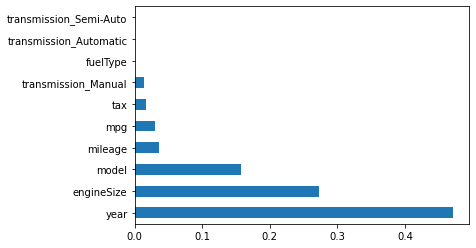

In [271]:
important_features = pd.Series(decisionTree.feature_importances_, index=X.columns)
important_features.nlargest(10).plot(kind='barh')
plt.show()

If we only looked at the correlation matrix in the beginning, if we had to choose a top 3, the most important features looking at the price row would have been: year, mileage and enginesize. But looking at the most important features shown in the plot above, we can see that model also is an important feature when predicting the price. All in all, we can see that the most important feature to predict the output is year by difference.